In [1]:
# Load convolve_im_freq from freq_1.ipynb 
from IPython.display import clear_output
%run -n freq_1.ipynb 
clear_output(wait=False) 

import os
import numpy as np
import utils
import matplotlib.pyplot as plt 

In [19]:
def create_kernel(im):
    """
    Creates a filter kernel in the frequency domain.

    Args:
        im: np.array of shape [H, W]
    Returns:
        kernel: np.array of shape [H, W]
    """
    kernel = np.ones_like((im))
    
    # Get image dimensions and find the center
    height, width = im.shape
    print(f"Image shape: {im.shape}")
    center_row = height // 2
    center_col = width // 2

    # Parameters for the notch filter
    line_thickness = 1      # How thick the blocked line should be (in pixels)
    preserved_width_center_half = 20   # Half-width of the preserved center
    
     
    top_row = center_row - line_thickness
    bottom_row = center_row + line_thickness
    kernel[top_row:bottom_row, :] = 0  
    

    left_col = center_col - preserved_width_center_half
    right_col = center_col + preserved_width_center_half
    kernel[top_row:bottom_row, left_col:right_col] = 1  # Restore center region to 1

    kernel = np.fft.fftshift(kernel)

    return kernel

Image shape: (538, 464)
Saving image to: image_processed\moon_filtered.png


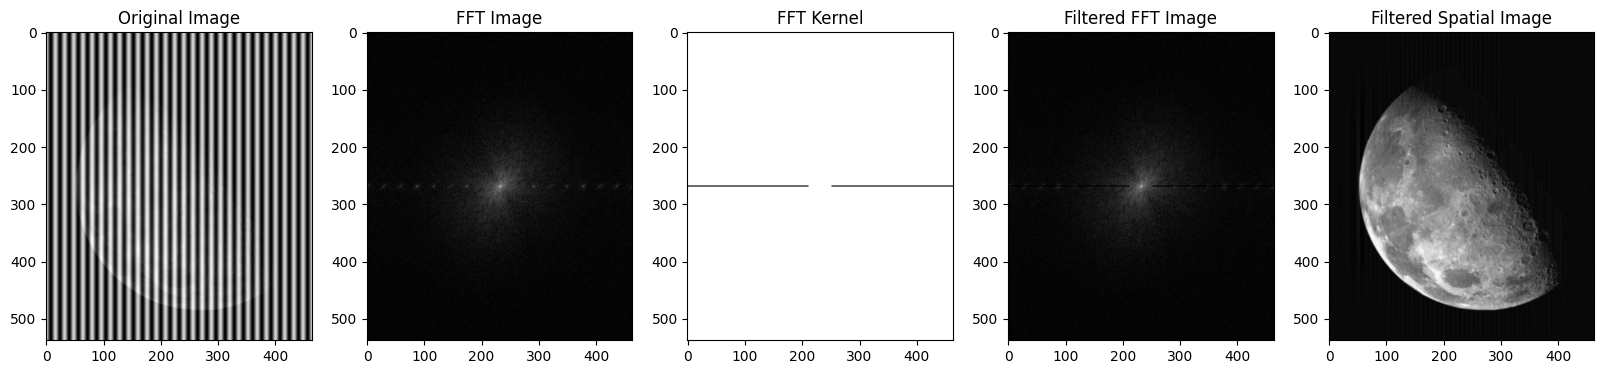

In [20]:
if __name__ == "__main__":
    # Changing this code should not be needed!
    
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    kernel = create_kernel(im)        
    # Note that this function is from your own implementation of convolve_im_freq from freq_1.ipynb
    im_filtered = convolve_im_freq(im, kernel, True) 
    
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))